# データの概要把握

In [1]:
import pandas as pd
import numpy as np

## データのロード

In [2]:
pn_df = pd.read_csv("input/pn.csv")

In [3]:
pn_df.head()

,label,text,judges
0,neutral,出張でお世話になりました。,"{""0"": 3}"
1,neutral,朝食は普通でした。,"{""0"": 3}"
2,positive,また是非行きたいです。,"{""1"": 3}"
3,positive,また利用したいと思えるホテルでした。,"{""1"": 3}"
4,positive,駅から近くて便利でした。,"{""0"": 1, ""1"": 2}"


## データサイズを調べる

In [4]:
pn_df.shape

(5553, 3)

## データの概要を調べる

In [5]:
pn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5553 non-null   object
 1   text    5553 non-null   object
 2   judges  5553 non-null   object
dtypes: object(3)
memory usage: 130.3+ KB


In [6]:
pn_df.describe(include=[object]).T

,count,unique,top,freq
label,5553,3,positive,3406
text,5553,5553,出張でお世話になりました。,1
judges,5553,10,"{""1"": 3}",2835


## データの欠損をチェック

欠損値がないことはinfo()からもわかるが、念の為isnull()の結果をカウントして別途調べておくとないことを二重チェックできて安心できます。

In [7]:
pn_df.isnull().sum()

label     0
text      0
judges    0
dtype: int64

## データのユニーク性をチェック

データがユニークでないと学習・検証・テストセットに被りが出る可能性があるため、ユニークであることを確認します。
`shape` と `describe` メソッドの結果からもユニークであることがわかりますが、ここでは `nunique` メソッドでチェックします。

In [8]:
pn_df["text"].nunique()

5553

`value_count` の結果が1でないものを数えてもユニークであるかどうかを確認できます。

In [9]:
# value_countsで1ではない数を数えてもわかります。
sum(pn_df["text"].value_counts() != 1)

0

## ラベルの分布の確認

`groupby` の結果を `describe` することでラベル分布を調べることができます。

In [10]:
pn_df.groupby("label").describe(include=[object])

text                            judges                        
         count unique            top freq  count unique        top  freq
label                                                                   
negative   818    818    と感じてしまいました。    1    818      4  {"-1": 3}   602
neutral   1329   1329  出張でお世話になりました。    1   1329      4   {"0": 3}   749
positive  3406   3406    また是非行きたいです。    1   3406      4   {"1": 3}  2835

<AxesSubplot:>

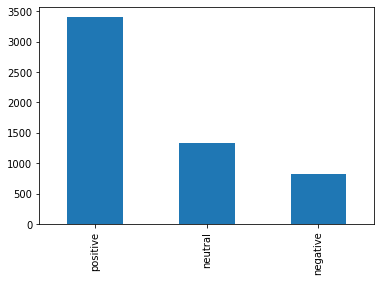

In [11]:
pn_df["label"].value_counts().plot(kind="bar")

## データの目視チェック

データを目視でチェックします。以外と忘れられているステップかもしれませんが最も重要なステップの一つで、
以下の問題点を洗い出します。

* データ自体の問題
* アノテーションの問題

次のステップに進む前に入念にデータに問題がないかをチェックしましょう。

In [12]:
# 繰り返し実行して中身をチェックします
pn_df.query('label == "positive"').sample(n=5)

,label,text,judges
1521,positive,枕も選べます。,"{""1"": 3}"
5010,positive,おやじ3人で宿泊しましたが、いたるところに気配りがなされていて、のんびりできました。,"{""1"": 3}"
2363,positive,想像以上に快適でした。,"{""1"": 3}"
3896,positive,朝食大満足。,"{""1"": 3}"
744,positive,またきます。,"{""0"": 1, ""1"": 2}"


In [13]:
pn_df.query('label == "negative"').sample(n=5)

,label,text,judges
1619,negative,アメニティが少ない。,"{""-1"": 3}"
528,negative,繁忙・ハイシーズンと平常時と比べて、料金差が大きい。,"{""-1"": 3}"
57,negative,今回は残念でした。,"{""-1"": 3}"
3794,negative,フロントの対応も悪い。,"{""-1"": 3}"
3766,negative,露天風呂は小さめ。,"{""-1"": 3}"


## Pandas Profilingを使う

https://github.com/ydataai/pandas-profiling

```{note}
Pandas Profilingを使うには事前にパッケージをインストールしておく必要があります。

    $ pip install pandas-profiling[notebook]==3.2.0
    
```

In [14]:
from pandas_profiling import ProfileReport

profile = ProfileReport(pn_df, title="Pandas Profiling Report", explorative=True)

In [15]:
# ウィジェットとして描画
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

```{note}
HTMLとして描画するには `.to_notebook_iframe` メソッドを使います。

    profile.to_notebook_iframe()
```